# **MNIST Handwritten Digits Dataset**

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. 30 contributed to this training set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

## **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from PIL import Image

In [2]:
path = "data/images"

## **Pre Analysis of Given Data**

### **What are the image file extensions?**

In [3]:
file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print()
print("Total Number of Files:", len(file_extensions))
print("File extensions:", set(file_extensions))

Reading images from data/images, Found 0 files.
Reading images from data/images\0, Found 178 files.
Reading images from data/images\1, Found 182 files.
Reading images from data/images\2, Found 177 files.
Reading images from data/images\3, Found 183 files.
Reading images from data/images\4, Found 181 files.
Reading images from data/images\5, Found 182 files.
Reading images from data/images\6, Found 181 files.
Reading images from data/images\7, Found 179 files.
Reading images from data/images\8, Found 174 files.
Reading images from data/images\9, Found 180 files.

Total Number of Files: 1797
File extensions: {'.png'}


### **What are the image sizes, extensions and modes?**

In [4]:
def read_image_files(path):
    images_data = []
    for root, dirs, files in os.walk(path):
        for file_name in files:
            extension = os.path.splitext(file_name)[-1]
            if extension in file_extensions:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path)
                images_data.append({"file_name": file_name,
                                    "extension": extension, 
                                    "size": img.size, 
                                    "mode": img.mode, 
                                    "dir": root})
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

In [5]:
%%time

images_data = read_image_files(path)

df = load_into_df(images_data)

df.head()

CPU times: total: 219 ms
Wall time: 211 ms


,file_name,extension,size,mode,dir
0,09NmGp6fe6vSaDFS2Qkx.png,.png,"(8, 8)",L,data/images\0
1,13L1SfP7oVB5nSIHsYl4.png,.png,"(8, 8)",L,data/images\0
2,17DsywNlvlJStwBVH2t9.png,.png,"(8, 8)",L,data/images\0
3,1bjajegk9k3C90aTvNol.png,.png,"(8, 8)",L,data/images\0
4,1H6SFB8yKiNLSMecDuSr.png,.png,"(8, 8)",L,data/images\0


In [6]:
df["extension"].value_counts()

extension
.png    1797
Name: count, dtype: int64

In [7]:
df["mode"].value_counts()

mode
L    1797
Name: count, dtype: int64

In [8]:
df["size"].value_counts()

size
(8, 8)    1797
Name: count, dtype: int64

### **Observations**
1. There are 1797 images in total.
2. All these images are having **.png** format.
3. All these images are of same size i.e. **(8, 8)** and same mode i.e. **Gray Scale**.

## **Step 1 - Loading the Data**

In [9]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

In [10]:
image_vectors, image_labels = vectorize_image_files(path)

image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,labels
0,0,0,63,255,191,15,0,0,0,31,...,0,0,0,31,207,255,127,0,0,0
1,0,0,36,200,182,18,0,0,0,0,...,0,0,0,54,236,255,91,0,0,0
2,0,0,182,236,255,145,0,0,0,0,...,0,0,18,200,200,18,0,0,0,0
3,0,0,79,175,63,15,0,0,0,0,...,0,0,0,63,207,191,159,0,0,0
4,0,0,31,239,127,0,0,0,0,0,...,0,0,0,15,143,191,79,0,0,0


## **Step 2 - Exploratory Data Analysis**

In [11]:
image_df.shape

(1797, 65)

In [12]:
image_df["labels"].value_counts()

labels
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

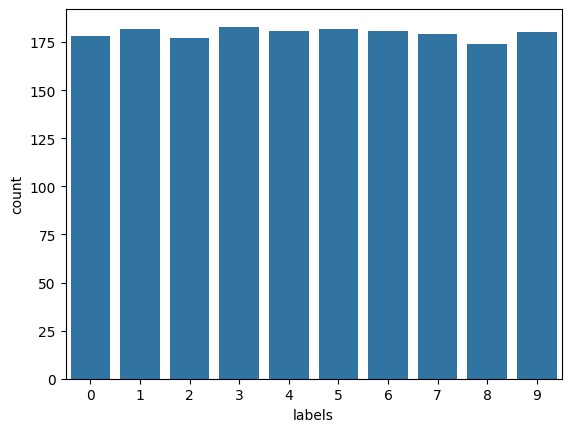

In [13]:
sns.countplot(data=image_df, x='labels')

Randomly Generated index: 299
Label of image at 299 index: 1

Data Type of Image Array: object
Image Array:
 [[0 0 95 239 191 79 0 0]
 [0 0 127 255 255 207 15 0]
 [0 0 127 255 255 191 0 0]
 [0 0 127 255 255 159 0 0]
 [0 0 255 255 255 79 0 0]
 [0 79 255 255 255 15 0 0]
 [0 47 239 255 255 31 0 0]
 [0 0 159 255 239 47 0 0]]


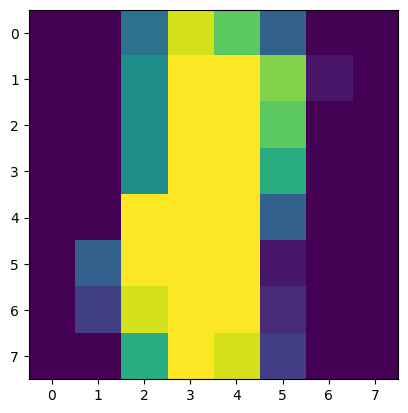

In [14]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

[ 331  819 1270 1479  988 1723  405  922  991]


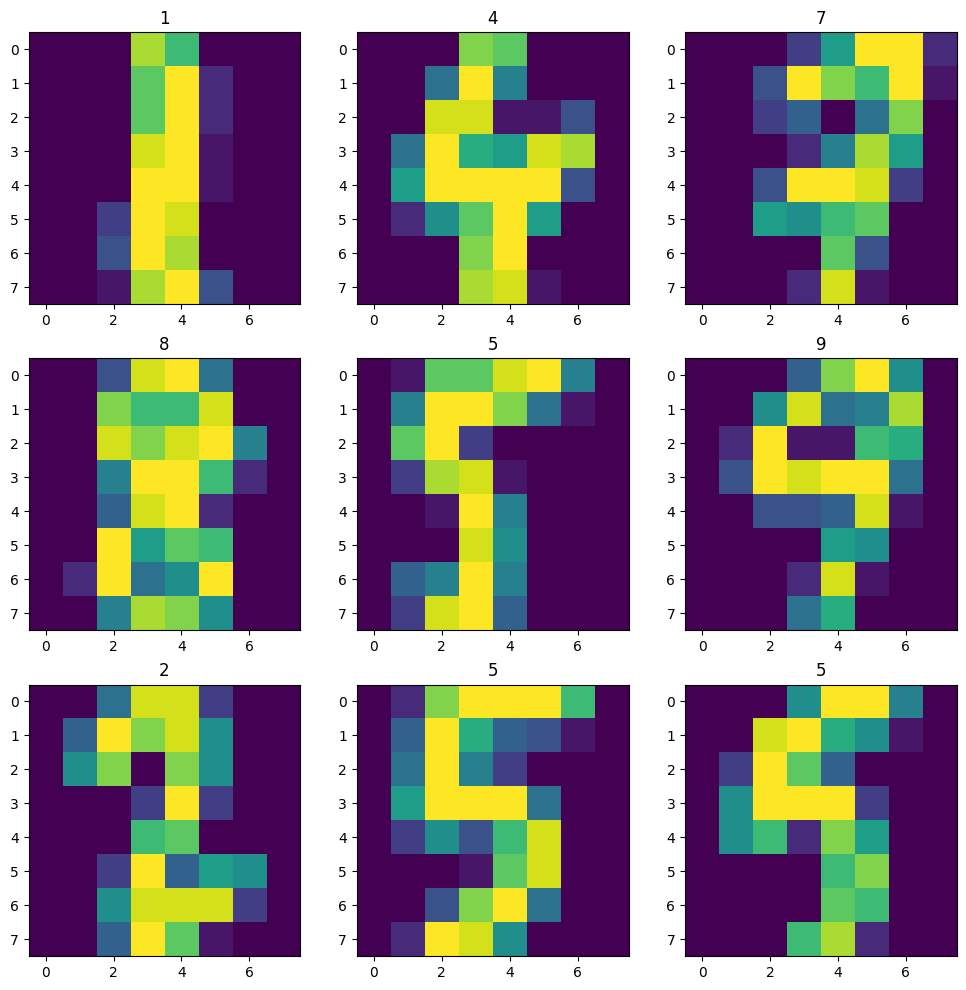

In [15]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, image_df.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = image_df.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(image_df.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)

## **Step 3 - Segregate Inputs (X) and Output (y)**

In [16]:
# Define the predictors (X) and target variable (y)

X = image_df.drop(columns=['labels'])

y = image_df['labels']

## **Step 4 - Split the data into Train and Test**

In [17]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


## **Step 5 and 7 - Data Preparation on Train and Test Data**

In [18]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train.index)

X_train_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
372,0.0,0.496063,1.000000,1.000000,0.184314,0.000000,0.0,0.0,0.0,0.686275,...,1.000000,0.000000,0.0,0.328671,1.000000,0.937255,0.498039,0.435294,0.247059,0.00000
1443,0.0,0.000000,0.247059,0.937255,0.435294,0.000000,0.0,0.0,0.0,0.058824,...,0.000000,0.000000,0.0,0.000000,0.121569,0.560784,0.749020,0.184314,0.000000,0.00000
1792,0.0,0.000000,0.247059,0.623529,0.811765,0.372549,0.0,0.0,0.0,0.058824,...,0.247059,0.000000,0.0,0.000000,0.121569,0.874510,0.937255,0.560784,0.000000,0.00000
211,0.0,0.000000,0.372549,0.811765,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.309804,0.072464,0.0,0.000000,0.372549,1.000000,1.000000,1.000000,1.000000,0.74902
632,0.0,0.000000,0.560784,1.000000,1.000000,0.749020,0.0,0.0,0.0,0.121569,...,0.937255,0.000000,0.0,0.000000,0.498039,1.000000,1.000000,1.000000,0.372549,0.00000


In [19]:
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_test.index)

X_test_transformed.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
1081,0.0,0.00000,0.937255,1.000000,1.000000,0.937255,0.560784,0.0,0.0,0.372549,...,0.000000,0.0,0.0,0.0,0.811765,1.000000,0.184314,0.000000,0.000000,0.000000
1707,0.0,0.00000,0.686275,0.874510,0.309804,0.000000,0.000000,0.0,0.0,0.372549,...,0.937255,0.0,0.0,0.0,0.686275,0.498039,0.247059,0.309804,1.000000,0.058824
927,0.0,0.00000,0.435294,0.686275,0.749020,0.874510,0.121569,0.0,0.0,0.498039,...,0.560784,0.0,0.0,0.0,0.623529,1.000000,0.811765,0.498039,0.000000,0.000000
713,0.0,0.11811,0.749020,1.000000,1.000000,0.560784,0.000000,0.0,0.0,0.686275,...,0.560784,0.0,0.0,0.0,0.811765,1.000000,1.000000,0.749020,0.058824,0.000000
262,0.0,0.00000,0.000000,0.000000,0.811765,1.000000,0.372549,0.0,0.0,0.000000,...,0.435294,0.0,0.0,0.0,0.000000,0.058824,0.749020,0.874510,0.309804,0.000000


## **Step 6, 8 and 9 - Training and Testing Phase (Decision Tree)**

In [22]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_transformed, y_train)

y_test_pred = dt_classifier.predict(X_test_transformed)

print("Model's Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy: 0.8644444444444445

CPU times: total: 31.2 ms
Wall time: 43.9 ms


## **Step 6, 8 and 9 - Training and Testing Phase (Random Forest)**

In [23]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_transformed, y_train)

y_test_pred = rf_classifier.predict(X_test_transformed)

print("Model's Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print()

Model's Accuracy: 0.9777777777777777

CPU times: total: 859 ms
Wall time: 1.15 s
